## The Data

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [122]:
file = 'Time-Series-Data.xlsx'
sheet = 'Daily' # change excel sheet
data = pd.read_excel(file, sheet)

timestamp = data.columns[0]
weather_aspect = data.columns[1] # change examining aspect of weather
weather = data.filter(items = [timestamp, weather_aspect])
weather.head()

,Date,Temperature
0,2018-07-01,34
1,2018-07-02,33
2,2018-07-03,34
3,2018-07-04,34
4,2018-07-05,34


## Indexing with Time Series Data

In [123]:
weather = weather.set_index(timestamp)
weather.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-06', '2019-06-07', '2019-06-08', '2019-06-09',
               '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13',
               '2019-06-14', '2019-06-15'],
              dtype='datetime64[ns]', name='Date', length=350, freq=None)

In [124]:
train_start = '2018-07-01' # change the start of train data
resample = '24H' # change the resample rule
y = weather[weather_aspect].resample(resample).mean()
y[train_start:]

Date
2018-07-01    34
2018-07-02    33
2018-07-03    34
2018-07-04    34
2018-07-05    34
2018-07-06    33
2018-07-07    30
2018-07-08    29
2018-07-09    29
2018-07-10    29
2018-07-11    30
2018-07-12    31
2018-07-13    28
2018-07-14    29
2018-07-15    28
2018-07-16    29
2018-07-17    29
2018-07-18    29
2018-07-19    27
2018-07-20    28
2018-07-21    27
2018-07-22    31
2018-07-23    31
2018-07-24    31
2018-07-25    29
2018-07-26    28
2018-07-27    28
2018-07-28    28
2018-07-29    29
2018-07-30    29
              ..
2019-05-17    33
2019-05-18    34
2019-05-19    33
2019-05-20    31
2019-05-21    27
2019-05-22    27
2019-05-23    28
2019-05-24    29
2019-05-25    30
2019-05-26    31
2019-05-27    28
2019-05-28    28
2019-05-29    26
2019-05-30    27
2019-05-31    26
2019-06-01    24
2019-06-02    27
2019-06-03    28
2019-06-04    30
2019-06-05    30
2019-06-06    30
2019-06-07    30
2019-06-08    31
2019-06-09    33
2019-06-10    32
2019-06-11    31
2019-06-12    33
2019-06-1

## Visualizing Furniture Sales Time Series Data

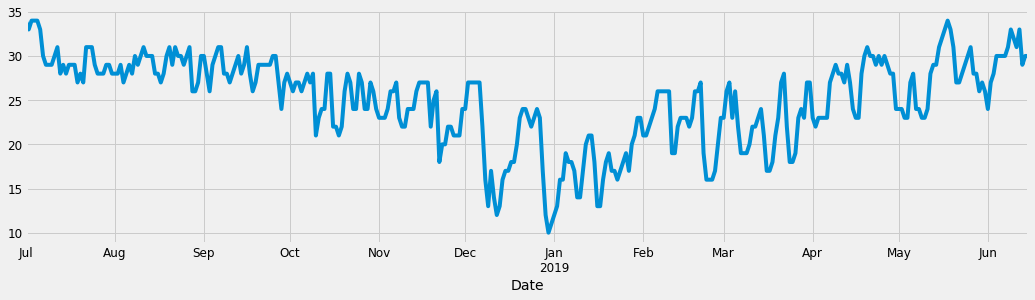

In [125]:
y.plot(figsize=(16, 4))
plt.show()

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: 
* trend
* seasonality
* noise.

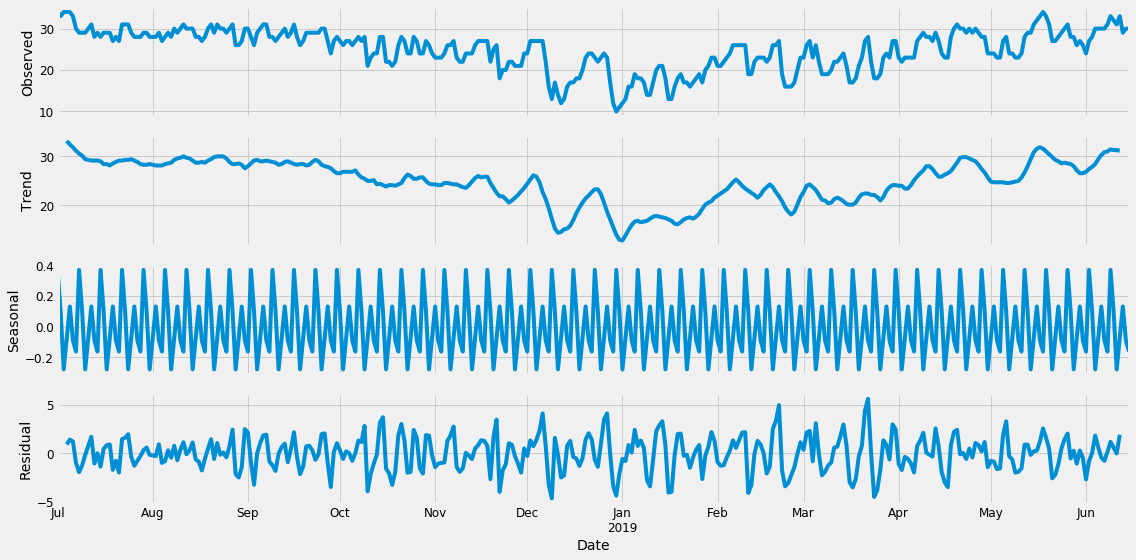

In [126]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Notes:

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [127]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
period = 30 # change seasonal period
seasonal_pdq = [(x[0], x[1], x[2], period) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 30)
SARIMAX: (0, 0, 1) x (0, 1, 0, 30)
SARIMAX: (0, 1, 0) x (0, 1, 1, 30)
SARIMAX: (0, 1, 0) x (1, 0, 0, 30)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [128]:
optimal_result = 10**5
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{}x{}{} - AIC:{}'.format(param, param_seasonal, period, results.aic))
            
            if results.aic < optimal_result:
              optimal_result = results.aic
              optimal_order = param
              optimal_seasonal_order = param_seasonal
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 30)30 - AIC:3250.779203602183
ARIMA(0, 0, 0)x(0, 0, 1, 30)30 - AIC:2678.5482419882874
ARIMA(0, 0, 0)x(0, 1, 0, 30)30 - AIC:1949.449111828607
ARIMA(0, 0, 0)x(0, 1, 1, 30)30 - AIC:1764.674551638072
ARIMA(0, 0, 0)x(1, 0, 0, 30)30 - AIC:1953.9836827474953
ARIMA(0, 0, 0)x(1, 0, 1, 30)30 - AIC:1926.0895732605363
ARIMA(0, 0, 0)x(1, 1, 0, 30)30 - AIC:1765.5078540579116
ARIMA(0, 0, 0)x(1, 1, 1, 30)30 - AIC:1761.9543479144838
ARIMA(0, 0, 1)x(0, 0, 0, 30)30 - AIC:2790.4593973826195
ARIMA(0, 0, 1)x(0, 0, 1, 30)30 - AIC:2312.7147828050065
ARIMA(0, 0, 1)x(0, 1, 0, 30)30 - AIC:1705.0246961862472
ARIMA(0, 0, 1)x(0, 1, 1, 30)30 - AIC:1514.7764153798528
ARIMA(0, 0, 1)x(1, 0, 0, 30)30 - AIC:1712.953764120003
ARIMA(0, 0, 1)x(1, 0, 1, 30)30 - AIC:1664.9276108728052
ARIMA(0, 0, 1)x(1, 1, 0, 30)30 - AIC:1520.5428604434528
ARIMA(0, 0, 1)x(1, 1, 1, 30)30 - AIC:1512.463209046392
ARIMA(0, 1, 0)x(0, 0, 0, 30)30 - AIC:1502.8536618567286
ARIMA(0, 1, 0)x(0, 0, 1, 30)30 - AIC:1391.04137373620

In [129]:
print('ARIMA{}x{}{} - AIC:{}'.format(optimal_order, optimal_seasonal_order, period, optimal_result))

ARIMA(1, 0, 1)x(0, 1, 1, 30)30 - AIC:1284.9683148678132


## Fitting the ARIMA model

In [130]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order = optimal_order,
                                seasonal_order = optimal_seasonal_order,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8866      0.036     24.946      0.000       0.817       0.956
ma.L1          0.2142      0.062      3.470      0.001       0.093       0.335
ma.S.L30      -1.0000    317.581     -0.003      0.997    -623.447     621.447
sigma2         4.1080   1304.798      0.003      0.997   -2553.250    2561.466


We should always run model diagnostics to investigate any unusual behavior.

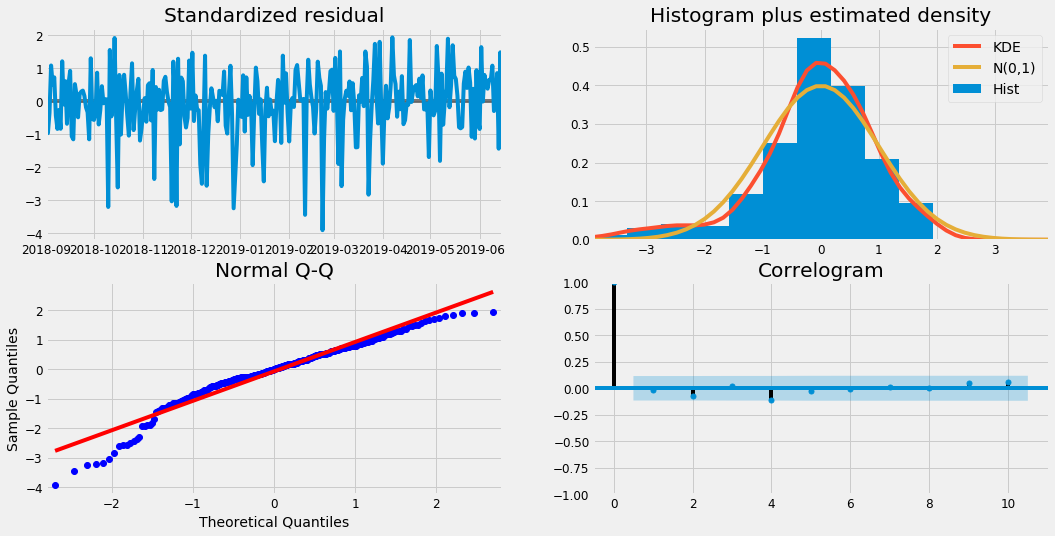

In [131]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Notes:

## Validating forecasts

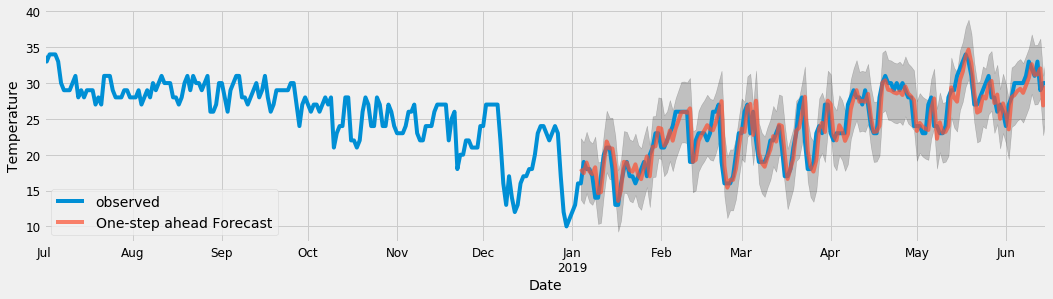

In [132]:
test_start = '2019-01-04' # change the start of test data
pred = results.get_prediction(start=pd.to_datetime(test_start), dynamic=False)
pred_ci = pred.conf_int()

ax = y[train_start:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel(timestamp)
ax.set_ylabel(weather_aspect)
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions.

In [133]:
y_forecasted = pred.predicted_mean
y_truth = y[test_start:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4.42


In [134]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2.1


## Producing and visualizing forecasts

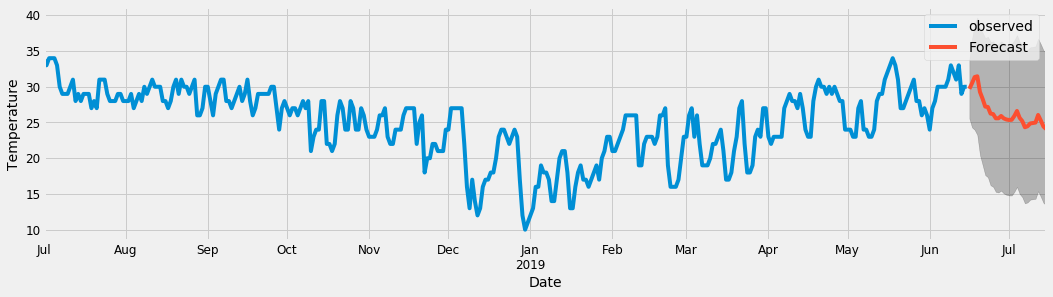

In [135]:
pred_uc = results.get_forecast(steps=30) # change the amount of predicted data
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(16, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel(timestamp)
ax.set_ylabel(weather_aspect)

plt.legend()
plt.show()